In [1]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#폰트 설정
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False},style='darkgrid')

<AxesSubplot:title={'center':'한글폰트'}>

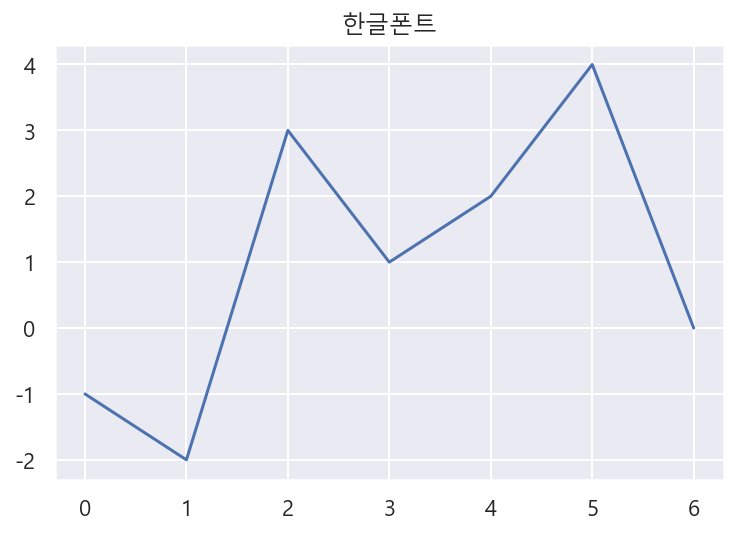

In [4]:
#폰트를 더 선명하게
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
pd.Series([-1,-2,3,1,2,4,0]).plot(title="한글폰트")

In [5]:
file = f"전국도시공원.csv"
file

'전국도시공원.csv'

In [6]:
df = pd.read_csv(file, encoding = "cp949")
df.shape

(18137, 20)

In [7]:
df.head(1)

,관리번호,공원명,공원구분,소재지도로명주소,소재지지번주소,위도,경도,공원면적,공원보유시설(운동시설),공원보유시설(유희시설),공원보유시설(편익시설),공원보유시설(교양시설),공원보유시설(기타시설),지정고시일,관리기관명,전화번호,데이터기준일자,제공기관코드,제공기관명,Unnamed: 19
0,26440-00001,구랑공원,문화공원,NaN,부산광역시 강서구 구랑동 1199-7,35.157215,128.854935,9137.0,4,NaN,화장실,NaN,"팔각정자, 파고라2, 평의자6, 앉음벽14.38m, 축구장(골대2), 컨테이너, 안...",2011-09-02,부산광역시 강서구청 녹지공원과,051-970-4536,2019-05-02,3360000,부산광역시 강서구,NaN


In [8]:
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

Pandas Profiling 사용해보기

In [9]:
import pandas_profiling

In [11]:
# pandas_profiling 의 ProfileReport 를 불러와 표현합니다.
# 이 때 title은 "도시공원 표준 데이터" 로 하고 주피터 노트북에서 바로 보면 iframe을 통해 화면이 작게 보이기 때문에
# 별도의 html 파일로 생성해서 그려보세요.
#from pandas_profiling import ProfileReport
#import matplotlib 
#matplotlib.font_manager._rebuild()

# 운영체제에 맞는 폰트를 설정해 주세요.
# Win
#plt.rc("font", family="Malgun Gothic")
# Mac
# plt.rc("font", family="AppleGothic")
# 위 폰트 설정 방법으로 오류가 난다면 아래의 seaborn set을 통해 설정해 보세요.

#sns.set(font="Malgun Gothic")
# Mac
#sns.set(font="AppleGothic")

#%time profile = ProfileReport(df, title="도시공원 표준 데이터")
#profile.to_file(output_file="05-park_pandas_profile.html")


In [12]:
df.isnull().sum()

관리번호                0
공원명                 0
공원구분                0
소재지도로명주소        10098
소재지지번주소           979
위도                  0
경도                  0
공원면적                0
공원보유시설(운동시설)    13292
공원보유시설(유희시설)    11173
공원보유시설(편익시설)    13053
공원보유시설(교양시설)    16977
공원보유시설(기타시설)    15021
지정고시일            2912
관리기관명             754
전화번호             1180
데이터기준일자             0
제공기관코드              0
제공기관명               0
Unnamed: 19     18137
dtype: int64

In [13]:
df.isnull().mean() #결측치의 비율
df.isnull().mean() *100 #퍼센트값
round(df.isnull().mean()*100,2)
#결측치가 많은 것들
#소재지도로명주소         55.68
#공원보유시설(운동시설)     73.29
#공원보유시설(유희시설)     61.60
#공원보유시설(편익시설)     71.97
#공원보유시설(교양시설)     93.60
#공원보유시설(기타시설)     82.82

관리번호              0.00
공원명               0.00
공원구분              0.00
소재지도로명주소         55.68
소재지지번주소           5.40
위도                0.00
경도                0.00
공원면적              0.00
공원보유시설(운동시설)     73.29
공원보유시설(유희시설)     61.60
공원보유시설(편익시설)     71.97
공원보유시설(교양시설)     93.60
공원보유시설(기타시설)     82.82
지정고시일            16.06
관리기관명             4.16
전화번호              6.51
데이터기준일자           0.00
제공기관코드            0.00
제공기관명             0.00
Unnamed: 19     100.00
dtype: float64

In [14]:
sns.set(font="Malgun Gothic", 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

<AxesSubplot:>

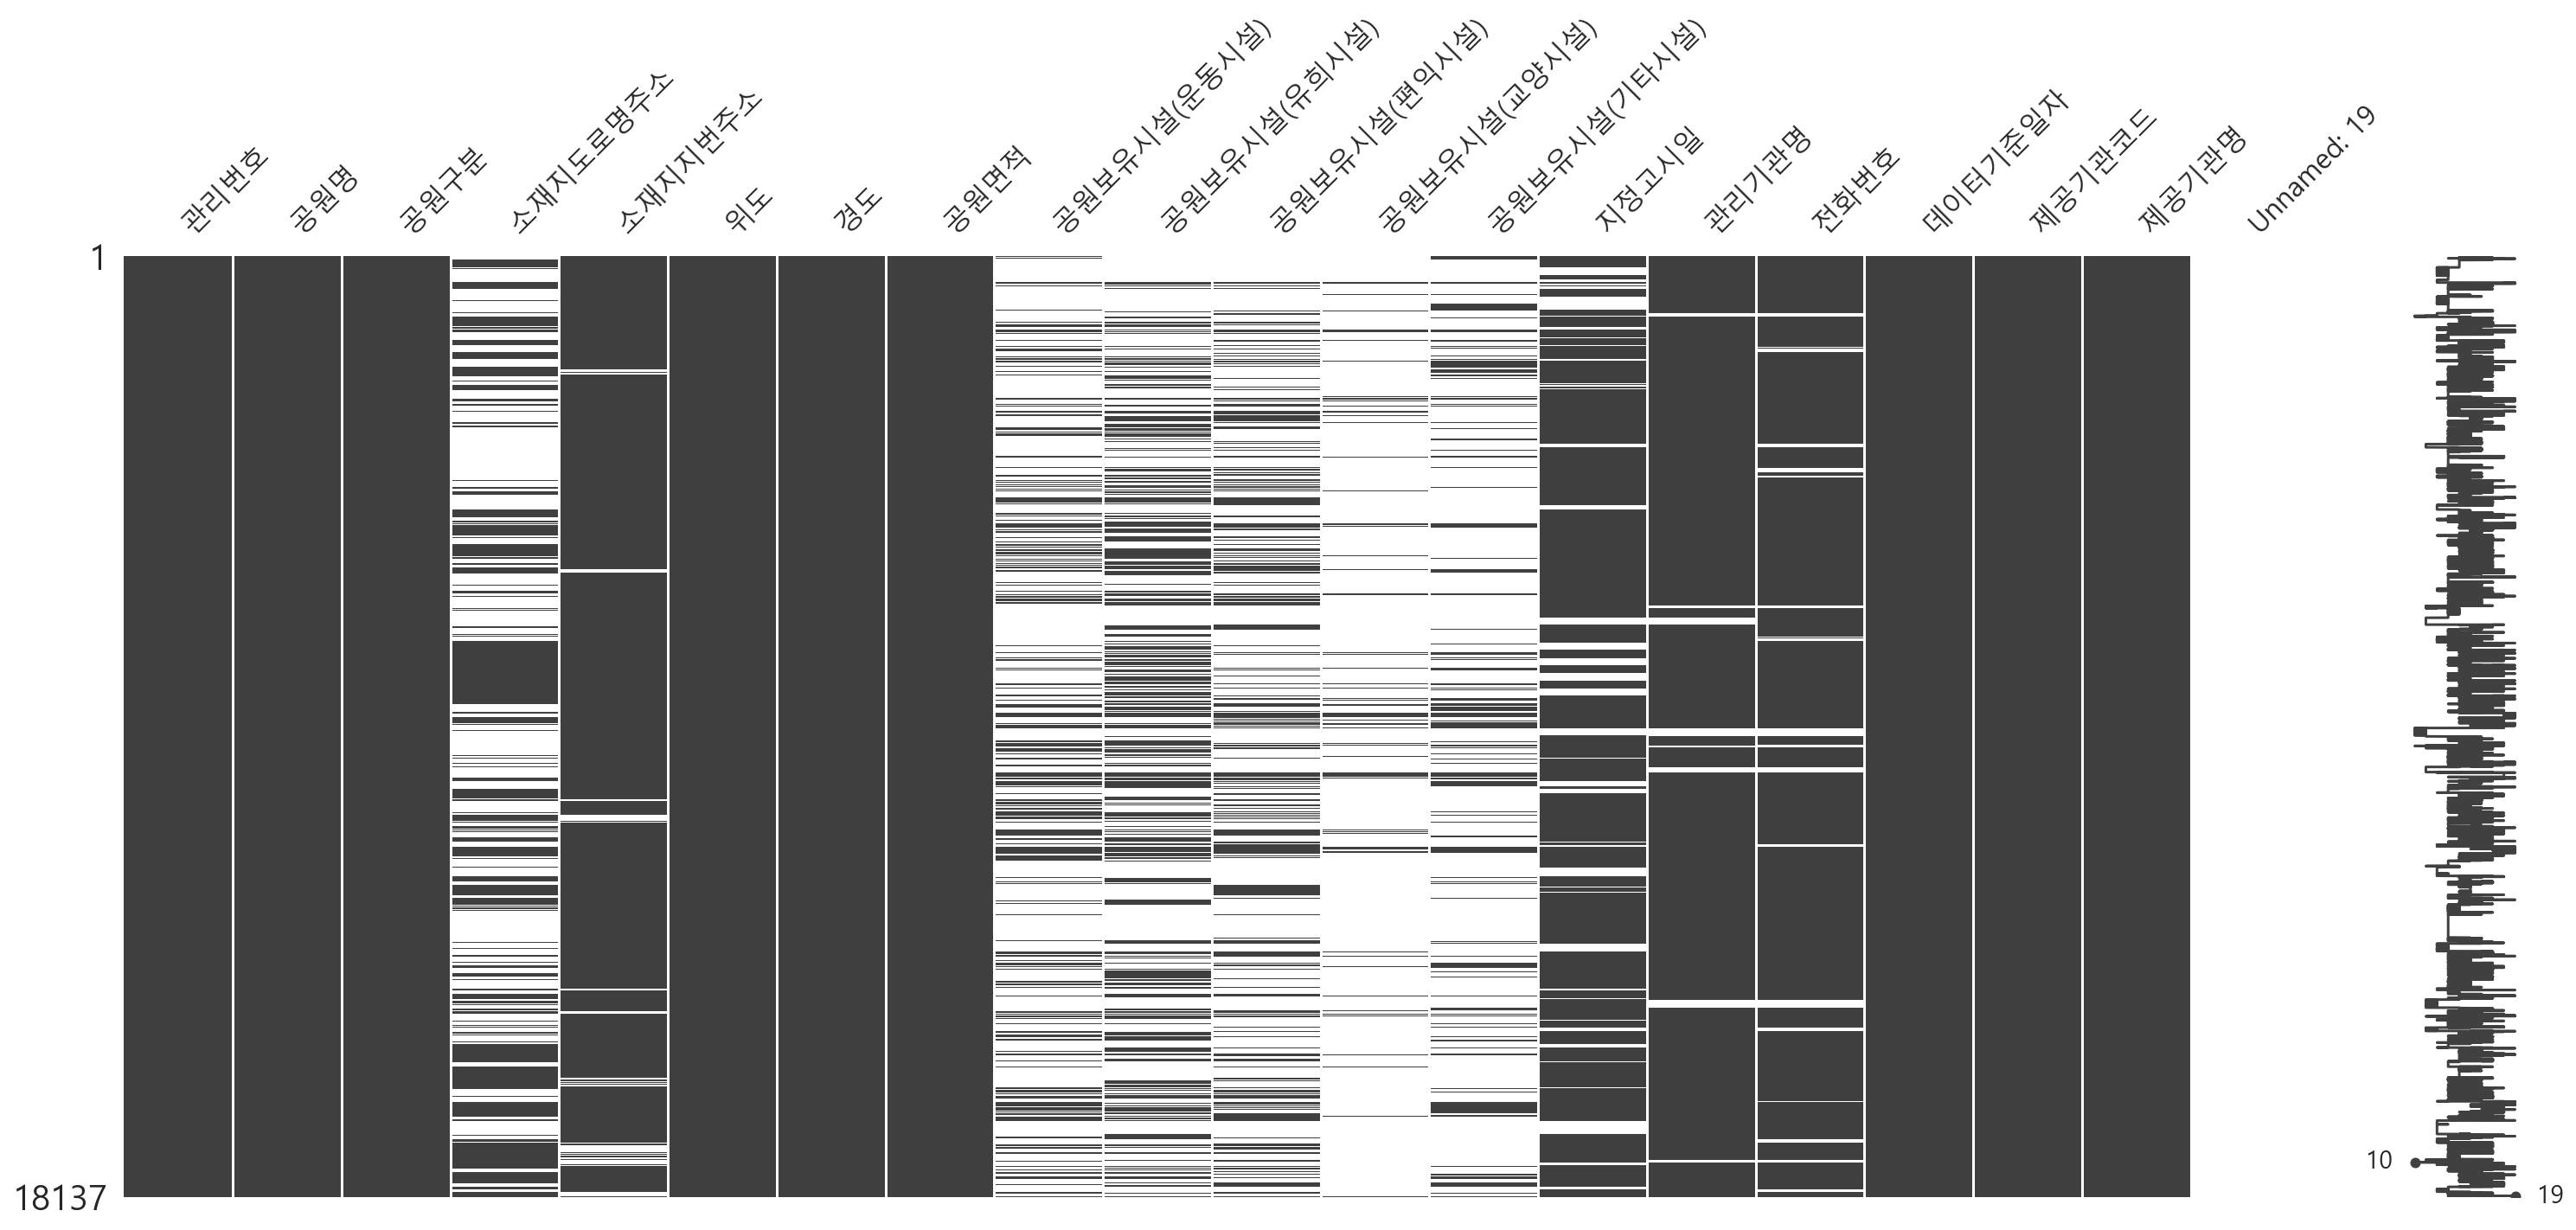

In [15]:
import missingno

missingno.matrix(df)

<AxesSubplot:>

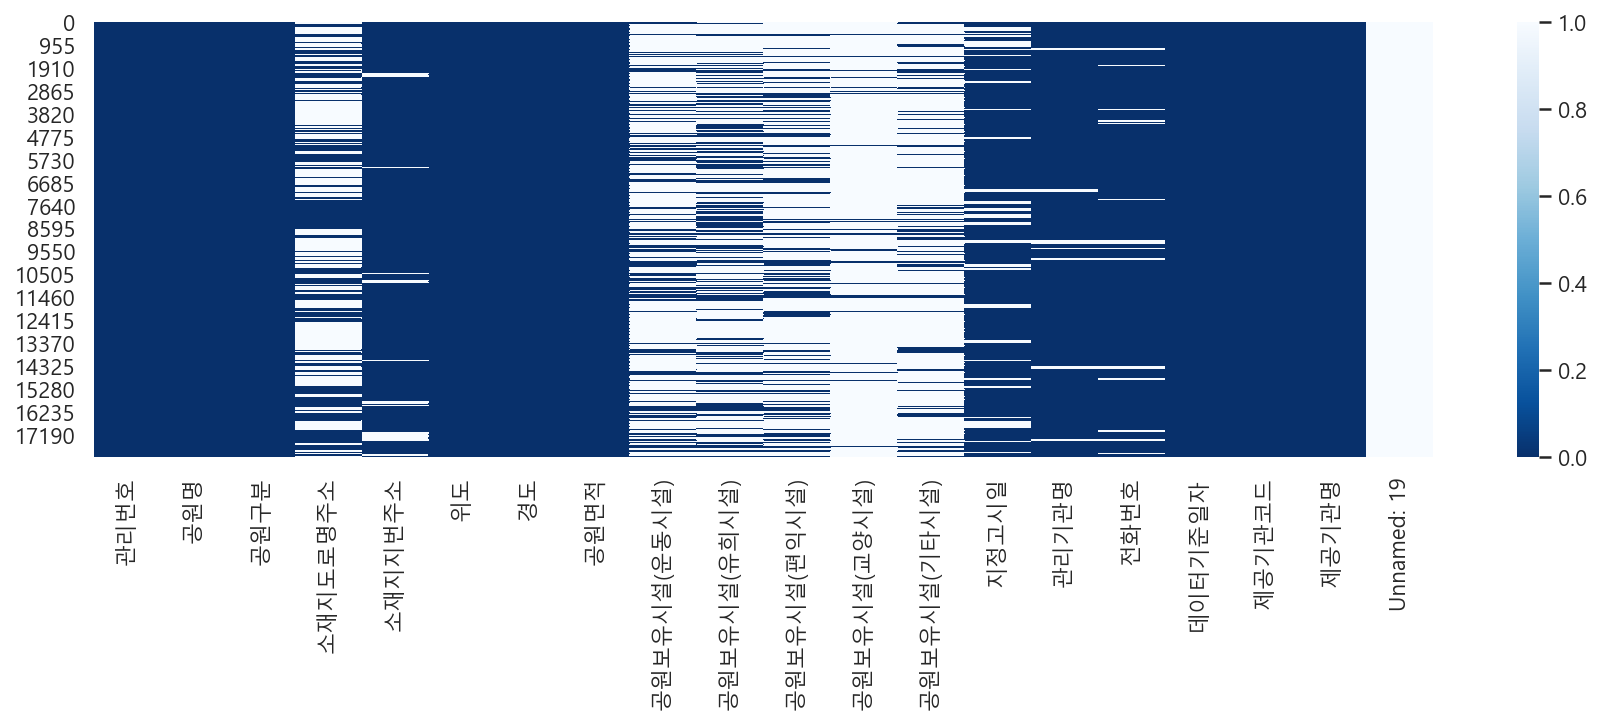

In [16]:
null = df.isnull()
plt.figure(figsize=(15,4))
sns.heatmap(null, cmap = "Blues_r") #


데이터 전처리

-불필요한 컬럼 제거
-시도 결측치 처리(다른 데이터로 대체, 도로명 혹은 지번 둘 중 하나만 있다면, 있는 데이터로 대체)

-아웃라이어 데이터 제거 혹은 대체

-위경도가 국내 범위를 벗어나는 데이터의 경우 제외하고 그리도록 처리

In [17]:
#전체 컬럼명을 출력해 봅니다.
df.columns

Index(['관리번호', '공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자', '제공기관코드', '제공기관명',
       'Unnamed: 19'],
      dtype='object')

In [19]:
#drop으로 'Unnamed: 19'를 제거하기 #결측치만 잇는 컬럼 제거하는것.
print(df.shape)
df = df.drop(["Unnamed: 19"], axis=1)
print(df.shape)

(18137, 20)
(18137, 19)


In [20]:
#결측치 대체
#도로명 주소의 널값 수
df['소재지도로명주소'].isnull().sum()

10098

In [21]:
df['소재지지번주소'].isnull().sum()

979

In [23]:
#소재지도로명주소와 소재지지번주소가 모두 결측치가 아닌 데이터를 찾습니다.
df[df['소재지도로명주소'].notnull() & df['소재지지번주소'].notnull()].shape

(7060, 19)

In [25]:
df['소재지도로명주소'] = df['소재지도로명주소'].fillna(df['소재지지번주소'])
df['소재지도로명주소'].isnull().sum()

0

In [26]:
df[df['소재지도로명주소'].isnull() & df['소재지지번주소'].isnull()].shape

(0, 19)

In [27]:
#파생변수 만들기
#주소를 통한 시도, 구군 변수 생성하기
#소재지도로명주소로 시도, 구군 변수 생성하기
#.str.split('', expand=True)[0]을 통해 공백문자로 분리하고 리스트의 첫번째 값을 가져오도록 하기